Ottimizzazione di un modello basato sulla regressione logistica tramite discesa del
gradiente, prima in maniera completamente autonoma, poi sfruttando la libreria SciKit-Learn

In [1]:
# Import librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc

In [1]:
# caricamento dataset
data = pd.read_csv("data/exams_data.csv")

# X = valori relativi alle features, tutte le colonne del dataset eccetto l'ultima
X = data.iloc[:, :-1]

# y = valori target, l'ultima colonna del dataseet
y = data.iloc[:, -1]

print(X)

print(y)

NameError: name 'pd' is not defined

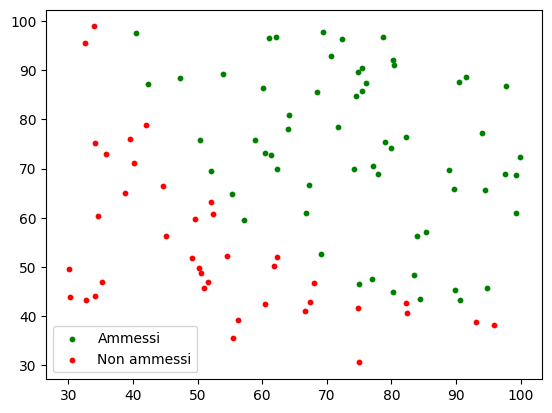

In [19]:
# filtro sugli ammessi
ammessi = data.loc[y == 1]

# filtro sui non ammessi
non_ammessi = data.loc[y == 0]

# plotto i risultati
plt.scatter(ammessi.iloc[:, 0], ammessi.iloc[:, 1], s=10, label='Ammessi', color="green")
plt.scatter(non_ammessi.iloc[:, 0], non_ammessi.iloc[:, 1], s=10, label='Non ammessi', color="red")
plt.legend()
plt.show()

## Preparazione del dataset

#### Trasformazione delle $X$

Andiamo ad aggiungere una colonna ai valori di $X$. 

Questa colonna conterrà tutti $1$ che verranno utilizzati successivamente per essere moltiplicati con l'elemento $\theta_0$ della regressione logistica

In [20]:
print(X.shape)

# c_ effettua una concatenazione sul secondo asse (colonne)
# è una "shortcut" di numpy su una funzione largamente utilizzata e, per
# questo, altamente ottimizzata ed efficiente                    
X = np.c_[np.ones((X.shape[0], 1)), X] 

print(X.shape)


(99, 2)
(99, 3)


#### Trasformazione delle $Y$

Andiamo ad aggiungere una colonna ai valori di $Y$. 

Prima di tutto trasformiamo $Y$ da una Panda Series a una lista

In [21]:
print(type(y))
y = y.values # trasformo y da una Pandas Series in una lista
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Successivamente aggiungiamo un nuovo asse a $Y$, in modo tale che da un'array monodimensionale, diventa una matrice con tante righe quanti i valori in $Y$ e un valore anche nullo come seconda colonna. 

Questo ci serve per rendere $Y$ in un formato compatibile con le $X$ per svolgere poi le varie operazioni tra le matrici

In [22]:
print(y.shape)

# trasformo y in una matrice di n righe ed una colonna, abbiamo aggiunto una nuova dimensione con np.newaxis
y = y[:, np.newaxis] 

print(y.shape)


(99,)
(99, 1)


#### Creazione dei parametre $\theta$

Andiamo a creare la matrice dei valori $\theta$. Questa matrice conterrà tanti valori quanti sono gli elementi di $X$. Inizialmente tutti questi valori saranno inizializzat a zero e verranno poi aggiornati dal modello durante la fase di training

In [23]:
theta = np.zeros((X.shape[1], 1))
print(theta)

[[0.]
 [0.]
 [0.]]


### Definizioni delle funzioni principali

Procediamo ora con la definizione della sigmoide, della funzione di costo e del gradiente

__sigmoid():__ Funzione di attivazione. Sarà utilizzata come funzione di attivazione per mappare i numeri reali di input su valori tra 0 e 1, sulla base dei valori dei parametri $\theta\$

$\sigma(z) = \frac{1}{1 + e^{-z}}$ 

--

__cost_function():__ Funzione di costo. Sarà utilizzata per calcolare il costo della funzione di attivazione per tutti gli esempi

$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(y^{(i)} \log \left(\sigma \left(\theta^T x^{(i)} \right) \right) + \left(1-y^{(i)} \right) \log \left(1-\sigma \left(\theta^T x^{(i)} \right) \right) \right)$

--

__gradient():__ Gradiente della funzione di costo. Sarà utilizzata per calcolare il gradiente sulla funzione di costo sulla base dei valori dei parametri $\theta\$

$\nabla J(\theta) = \frac{1}{m} X^T (\sigma(X\theta) - y)$


In [24]:
 def sigmoid(z):
    return 1 / (1 + np.exp(-z))



def cost_function(theta, x, y):
    
    total_cost = -(1 / x.shape[0]) * np.sum(
                                    y  * np.log(sigmoid(np.dot(x, theta))) 
                                    + 
                                    (1 - y) * np.log(1 - sigmoid(np.dot(x, theta)))
                                   )
    return total_cost



def gradient(theta, x, y):
    
    return (1 / x.shape[0]) * np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

### Addestramento del modello

A questo punto possiamo passare alla fase di addrestamento del modello.

Utilizzando il metodo fit, andremo andremo a minimizzare il costo della funzione cost_function() rispetto ai parametri theta tramite la funzione fmin_tnc() della libreria scipy

Gli argomenti richiesti da fmin_tnc() sono:

- __func:__ la funzione di costo da utilizzare

- __x0:__ i parametri da ottimizzare 

- __fprime:__ la funzione di derivata prima della funzione di costo da utilizzare per l'ottimizzazione dei parametri

- __args:__ gli esempi di train da utilizzare per l'ottimizzazione dei parametri. Nota che in questo contesto Y glielo passiamo come array monodimensionale, perché così è richiesto dalla libreria

La funzione fit(), dopo avere effettuato l'addestramento, ci restituirà un array di lungezza theta.size(), contentente i parametri ottimizzati

In [25]:
# minimizzo il costo della funzione cost_function rispetto
# ai parametri theta tramite la funzione fmin_tnc della
# libreria scipy    
def fit(x, y, theta):
    
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y.flatten()))
    
    return opt_weights[0]

parameters = fit(X, y, theta)


  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   2.89982570E+02
    1    3  6.276894178094481E-01   7.35412266E-01
    2    5  5.923168562936202E-01   6.79236154E+01
    3    7  3.703550634937350E-01   2.43018451E+01
    4    9  3.566192403872509E-01   6.65132908E+00
    5   13  3.205910112788343E-01   7.28761553E+00
    6   15  3.167658493789968E-01   1.35592357E+01
    7   19  2.400845557116758E-01   2.46504347E+00
    8   21  2.385366131480634E-01   1.11830168E-03
tnc: fscale = 29.9034
    9   23  2.385349982476269E-01   1.36580013E-03
   10   25  2.343972157364771E-01   8.42053829E-01
tnc: fscale = 1.08976
   11   27  2.335864887437307E-01   3.80559269E-01
   12   29  2.307067590127897E-01   3.33374155E-03
   13   31  2.304049054374281E-01   8.01291111E-02
   14   33  2.301767294370710E-01   1.07079022E-01
tnc: stepmx = 1000
   15   36  2.046968945832519E-01   4.01769830E-02
   16   38  2.046676244802180E-01   7.33496472E-02
   17   40  2.045705599879346

Printiamo a schermo i valori dei parametri ottenuti dalla fase di training e l'equazione che rappresenta il nostro conffine decisionale

### Plot del confine decisionale

Sfruttando i paramentei $\theta$ individuati dal modello, andiamo a plottare la retta rappresentante il confine decisionale.

E' importante osservare infatti, come tramite l'ottimizzazione dei parametri $\theta$ all'interno di $\sigma(\theta)$ attraverso la minimizzazione della funzione di costo $J(\theta)$ siamo in grado di creare una disequazione che funge da confine decisionale.

__Questo accade perché__

se $\sigma(z) \geq 0.5 \rightarrow \hat y = 1 $ 

mentre 

se $\sigma(z) < 0.5 \rightarrow \hat y = 0 $

e inoltre sappiamo che 

$\sigma(z) = \frac{1}{1 + e^{-z}}$


e dato che 

$\sigma(z) \geq 0.5 \rightarrow z \geq 0$ 

e che

$\sigma(z) < 0.5 \rightarrow z < 0$


allora abbiamo che

$\hat y = 1 \rightarrow z \geq 0$

e che 

$\hat y = 0 \rightarrow z < 0$

Ora, ragionando nell'esempio precendente (con sole due features), abbiamo che

$ z = \theta X^T = \theta_0 + \theta_\ x_1 + \theta_2 x_2 $

quindi 

$\hat y = 1 \rightarrow \theta_0 + \theta_\ x_1 + \theta_2 x_2 \geq 0 $

da cui

$\theta_2 x_2 \geq - (\theta_0 + \theta_\ x_1) $

e quindi infine


$ x_2 \geq -\frac{\theta_0 + \theta_1 x_1}{\theta_2} $

Questo dunque ci porta ad avere uan diseguaglianza sul piano $X_1, X_2$ che possiamo plottare per dividere dall confine decisionale

Lo stesso discorso vale ovviamente in $R^n$ con l'impossibilità però di plottare così facilmente il confine decisionale

$
\begin{equation*}
\begin{gathered}
\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0
\\\\
\theta_2 x_2 = -(\theta_0 + \theta_1 x_1) 
\\\\
x_2 = -\frac{\theta_0 + \theta_1 x_1}{\theta_2}
\end{gathered}
\end{equation*}
$

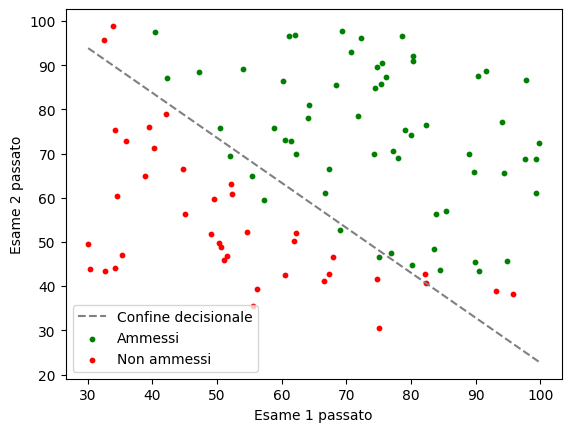

Parametri theta:
-
theta_0: -24.86558264025691
theta_1: 0.20334360708115276
theta_2: 0.19985055557793222

Equazione del confine decisionale:
-
theta_0*x_0 + theta_1*x_1 + theta_2*x_2


In [27]:
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Confine decisionale', color="gray", linestyle='--')

plt.xlabel('Esame 1 passato')
plt.ylabel('Esame 2 passato')

plt.scatter(ammessi.iloc[:, 0], ammessi.iloc[:, 1], s=10, label='Ammessi', color="green")

plt.scatter(non_ammessi.iloc[:, 0], non_ammessi.iloc[:, 1], s=10, label='Non ammessi', color="red")

plt.legend()
plt.show()

confine_decisionale = ""

print("Parametri theta:")
print("-")

for i, p in enumerate(parameters):
    
    
    print(f"theta_{i}: {parameters[i]}")
    
    confine_decisionale += f"theta_{i}*x_{i}"
    
    if(i < len(parameters) - 1):
        confine_decisionale +=  " + "

print("")
print("Equazione del confine decisionale:")
print("-")
print(confine_decisionale)

### Calcoliamo l'accuracy del modello

Per calcolare l'accuracy del modello abbiamo due metodi.

__METODO 1: CALCOLO TRAMITE MODELLO__

Il primo metodo consiste nello sfruttare l'equazione di ipotesi con i paramtetri $\theta$ ottenuti con la fase di fit, in modo da calcolare $\sigma(\theta X^T)$ e utilizzare un valore di trasholad $TH$ (ad esempio 0.5) sui risultati ottenti in modo tale che:

$
\sigma(\theta X^T) \geq TH \ \rightarrow \ \hat y = 1
\\
\sigma(\theta X^T) < TH \ \rightarrow \ \hat y = 0
$

A questo punto andiamoa  confrontare i valori di $\hat Y$ ottenuti per le $X$ testate, con gli effettivi valori d $Y$, in modo da ottenere l'accuracy del modello

In [12]:
def predict_with_sigmoid(x):
    theta = parameters[:, np.newaxis]
    return sigmoid(np.dot(x, theta))

def accuracy_with_sigmoid(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict_with_sigmoid(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    
    # equivalente a accuracy = sum(predicted_classes == actual_classes)/len(actual_classes)*100
    accuracy = np.mean(predicted_classes == actual_classes)
    
    return accuracy * 100

print('Accuratezza tramite sigmoide', accuracy_with_sigmoid(X, y.flatten()), "%")

Accuratezza tramite sigmoide 88.88888888888889 %


__METODO 2: CALCOLO TRAMITE DISEGUAGLIANZA__

Il secondo metodo consiste nel risolvere la diseguaglianza di del confine decisionale $ x_2 \geq -\frac{\theta_0 + \theta_1 x_1}{\theta_2} $ utilizzando i valori $\theta$ ottimizzati dal modello durante il fit, sapendo che:

$ 
x_2 \geq -\frac{\theta_0 + \theta_1 x_1}{\theta_2} \rightarrow \hat Y = 1
\\
\\
x_2 < -\frac{\theta_0 + \theta_1 x_1}{\theta_2} \rightarrow \hat Y = 0
$


A questo punto andiamoa  confrontare i valori di $\hat Y$ ottenuti per le $X$ testate, con gli effettivi valori d $Y$, in modo da ottenere l'accuracy del modello.

A questo punto andiamoa  confrontare i valori di $\hat Y$ ottenuti per le $X$ testate, con gli effettivi valori d $Y$, in modo da ottenere l'accuracy del modello

In [13]:
def predict_with_border(x):
    
    tmp = - (parameters[0] + np.dot(parameters[1], x[:, 1])) / parameters[2]
    
    return x[:, 2] >= tmp


def accuracy_with_border(x, y):
    
    # equivalente a sum(y.flatten() == predict_with_border(X))/len(y)*100
    return np.mean(y.flatten() == predict_with_border(X))*100

print('Accuracy tramite diseguaglianza: ', accuracy_with_border(X, y.flatten()) , "%")

Accuracy tramite diseguaglianza:  88.88888888888889 %


Ovviamente vediamo che i risultati di entrambi e i metodi sono coerenti tra loro!

### Fit con  sci-kit learn

Rifacciamo nuovamente il fit del modello, utilizzando questa volta la libreria sci-kit learn.

Importante notare che sci-kit learn lavora in maniera altamente performante su questa tipologia di operazioni, anche su grandi quantità di dati.

Sarà sci-kit learn stesso inoltre, a restituirci i valori di accuracy del modello

In [14]:
# implementazione con sci-kit learn:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

X = X[:, 1:]

#traformiamo l'array monodimensionle in una matrice che ha
# N righe tanti quanti gli elementi dell'array e un'unica colonna per il valore
# questo è importante per mantere la corenza nelle dimensioni 
y = np.reshape(y, (len(y), 1))

# Addrestiamo il modello
model.fit(X, y.flatten())

# Facciamo predizione con il modello addestrato
predicted_classes = model.predict(X)

# Calcoliamo l'accuratezza
accuracy = accuracy_score(y, predicted_classes)

# Otteniamo i parametri del modello
# > model.coef_: ci restituisce i coefficienti delle varie X
# > model.intercept_: ci restiuisce il valore della distanza dall'origine
parameters = model.coef_
bias = model.intercept_

Stampiamoci infine l'accuratezza e il valore dei parametri ottenuti tramite il fit fatto con sci-kit learn.

Possiamo notare come i risultati siano praticamente equivalenti a quelli ottenuti in precedenza

In [15]:
print('Accuratezza', accuracy * 100)
print('Parametri:', parameters)
print('Bias:', bias)

Accuratezza 88.88888888888889
Parametri: [[0.20251777 0.19901181]]
Bias: [-24.76261953]


Plottiamoci nuovamente il confine decisionale, utilizzando i parametri $\theta$ ottenuti tramite il fit fatto con sci-kit learn.

Possiamo notrare ovviamente che, dato che i paramentri sono gli stessi, anche il plot sarà identico a quello precedente.

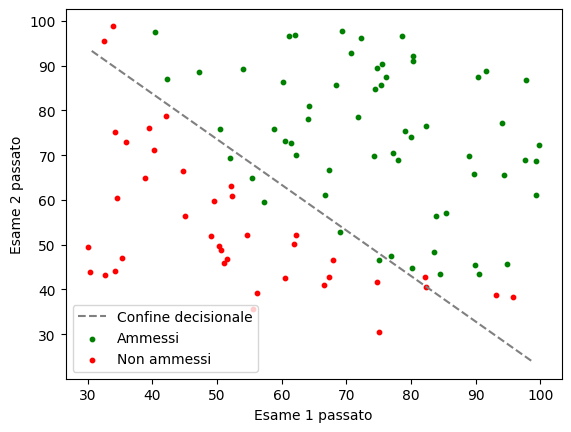

In [16]:
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (bias[0] + np.dot(parameters[0][0], x_values)) / parameters[0][1]

plt.plot(x_values, y_values, label='Confine decisionale', color="gray", linestyle='--')
plt.xlabel('Esame 1 passato')
plt.ylabel('Esame 2 passato')
plt.scatter(ammessi.iloc[:, 0], ammessi.iloc[:, 1], s=10, label='Ammessi', color="green")
plt.scatter(non_ammessi.iloc[:, 0], non_ammessi.iloc[:, 1], s=10, label='Non ammessi', color="red")
plt.legend()
plt.show()